In [85]:
import pandas as pd
import numpy as np

In [86]:
df = pd.read_csv("https://raw.githubusercontent.com/ZoeLeBlanc/visualizing_humanities_data_workshop/master/web_scraped_humanist_listserv.csv")
df = df.iloc[:21]

In [87]:
df

,dates,text
0,1987-1988,From: MCCARTY@UTOREPAS\nSubject: \nDate: 12 Ma...
1,1988-1989,From: Sebastian Rahtz \nSubject: C++ and Gnu o...
2,1989-1990,From: Willard McCarty \nSubject: Happy Birthda...
3,1990-1991,From: Elaine Brennan & Allen Renear \nSubject:...
4,1991-1992,From: Elaine Brennan & Allen Renear \nSubject:...
5,1992-1993,From: Elaine M Brennan \nSubject: Humanist's B...
6,1993-1994,From: 6500card%ucsbuxa@hub.ucsb.edu (Cheryl A....
7,1994-1995,From: Andrew Burday \nSubject: Re: 7.0638 Qs: ...
8,1995-1996,"From: ""Gregory Bloomquist"" \nSubject: Round Ta..."
9,1996-1997,From: Humanist \nSubject: Humanist begins its ...


In [88]:
import nltk
from nltk import word_tokenize
from nltk import FreqDist

In [89]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()

In [90]:
df['cleaned_dates'] = df['dates'].str.replace('-', '/')
df['year_start'] = df['cleaned_dates'].str.split('/').str[0]
df['year_end'] = df['cleaned_dates'].str.split('/').str[1]

In [91]:
df['volume_size'] = df['text'].str.count('\n')

<AxesSubplot:xlabel='year_start'>

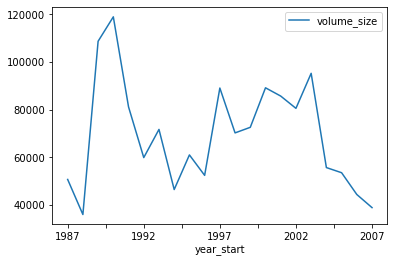

In [92]:
df.plot(x='year_start', y='volume_size', kind='line')

In [93]:
def stem_words(row):
    stemmed_words = ''
    for token in row.text.split(' '):
        stemmed_words += porter.stem(token) + ' '
    return stemmed_words


In [94]:
df['stemmed_text'] = df.apply(stem_words,axis=1)

In [95]:
df.head(3)

,dates,text,cleaned_dates,year_start,year_end,volume_size,stemmed_text
0,1987-1988,From: MCCARTY@UTOREPAS\nSubject: \nDate: 12 Ma...,1987/1988,1987,1988,50794,from: mccarty@utorepas\nsubject: \ndate: 12 ma...
1,1988-1989,From: Sebastian Rahtz \nSubject: C++ and Gnu o...,1988/1989,1988,1989,36109,from: sebastian rahtz \nsubject: c++ and gnu o...
2,1989-1990,From: Willard McCarty \nSubject: Happy Birthda...,1989/1990,1989,1990,108695,from: willard mccarti \nsubject: happi birthda...


In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

documents = df.text.tolist()
vectorizer = TfidfVectorizer(max_df=0.5, min_df=1,stop_words=stop_words)

In [97]:
transformed_documents = vectorizer.fit_transform(documents)

transformed_documents_as_array = transformed_documents.toarray()

dates = df.dates.tolist()
tfidf_results = []
for counter, doc in enumerate(transformed_documents_as_array):
    tf_idf_tuples = list(zip(vectorizer.get_feature_names(), doc))
    one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)
    one_doc_as_df['dates'] = dates[counter]
    tfidf_results.append(one_doc_as_df)

In [98]:
import warnings
warnings.filterwarnings("ignore")

In [99]:
tfidf_df = pd.concat(tfidf_results)
tfidf_df = tfidf_df.sort_values(by=['score'], ascending=False)
tfidf_df.head(10)

,term,score,dates
0,ninch,0.841249,2002-2003
0,ninch,0.822897,2000-2001
0,ninch,0.790522,2001-2002
0,utorepas,0.766377,1987-1988
0,ninch,0.671890,1999-2000
0,ninch,0.648168,1998-1999
1,amico,0.444180,1999-2000
0,fqs,0.426306,2005-2006
0,ninch,0.412630,1997-1998
0,wmccarty,0.384587,2007-2008


In [100]:
tfidf_df[0:200].term.unique()

array(['ninch', 'utorepas', 'amico', 'fqs', 'wmccarty', 'fludd', 'google',
       'elra', 'wikipedia', '7848', 'ruhc', '3dx', 'ippe',
       'mccarty_at_kcl', 'astra', 'tocs', 'vax', 'arundel', 'saddam',
       '005', '1617', '0558', 'ichim99', '5801', 'lemme', 'penndrls',
       '4020', 'infinitum', 'php', 'tambovtsev', 'dah', 'wiki', 'oa',
       'qs', 'kis', 'ecu', 'hussein', 'acadvm1', 'ceth', 'hums',
       'hforums', '441495', 'ugl', 'riao97', 'mith', 'brownvm',
       'hasselmo', 'ahrc', 'b7', 'celia', 'werman', 'forks', '19cwww',
       'oxfordjournals', 'esf', 'vagueness', 'iraq', 'springerlink',
       'missile', 'hdb', 'sepln', 'ichim07', 'kevitt', 'neach', 'carf',
       'idbsu', 'dfl', 'blog', 'waxweb', 'pacling', 'e5', 'confu',
       'amish', 'hypermedia_joyce', 'mellen', 'arun', 'pali', 'vspace',
       'mw2004', 'psc90', 'iee', 'unhd', 'riao', 'osher', 'suginami',
       'gratia', 'mw2005', 'easi', 'etoc', 'giampapa', 'turkic',
       'fraktur', '3974', 'hurd', 'oikawa

In [101]:
tfidf_df['year_start'] = tfidf_df['dates'].str.split('-').str[0].astype(int)
tfidf_df['year_end'] = tfidf_df['dates'].str.split('-').str[1].astype(int)

In [110]:
#Top 10 for all data
tfidi_sort = tfidf_df.sort_values(by=['score'], ascending=False)
top_ten_tfidf = tfidi_sort.drop_duplicates(subset ="term",keep = 'first').head(10)
top_ten_tfidf

,term,score,dates,year_start,year_end
0,ninch,0.841249,2002-2003,2002,2003
0,utorepas,0.766377,1987-1988,1987,1988
1,amico,0.444180,1999-2000,1999,2000
0,fqs,0.426306,2005-2006,2005,2006
0,wmccarty,0.384587,2007-2008,2007,2008
1,fludd,0.337311,2007-2008,2007,2008
0,google,0.333120,2004-2005,2004,2005
1,elra,0.321378,1997-1998,1997,1998
1,wikipedia,0.316421,2005-2006,2005,2006
0,7848,0.301380,2003-2004,2003,2004


In [111]:
#top 10 after 2000
after_2000_df = tfidf_df[tfidf_df['year_end'] >2000]
after_2000_df_sort = after_2000_df.sort_values(by=['score'], ascending=False)
top_ten_after_2000_df = after_2000_df_sort.drop_duplicates(subset ="term",keep = 'first').head(10)
top_ten_after_2000_df

,term,score,dates,year_start,year_end
0,ninch,0.841249,2002-2003,2002,2003
0,fqs,0.426306,2005-2006,2005,2006
0,wmccarty,0.384587,2007-2008,2007,2008
1,fludd,0.337311,2007-2008,2007,2008
1,amico,0.333286,2001-2002,2001,2002
0,google,0.333120,2004-2005,2004,2005
1,wikipedia,0.316421,2005-2006,2005,2006
0,7848,0.301380,2003-2004,2003,2004
2,3dx,0.273620,2005-2006,2005,2006
3,mccarty_at_kcl,0.258334,2005-2006,2005,2006


In [112]:
#top 10 before 2000
before_2000_df = tfidf_df[tfidf_df['year_end'] <2000]
before_2000_df_sort = before_2000_df.sort_values(by=['score'], ascending=False)
top_ten_before_2000_df = before_2000_df_sort.drop_duplicates(subset ="term",keep = 'first').head(10)
top_ten_before_2000_df

,term,score,dates,year_start,year_end
0,utorepas,0.766377,1987-1988,1987,1988
0,ninch,0.648168,1998-1999,1998,1999
1,elra,0.321378,1997-1998,1997,1998
0,ruhc,0.293491,1996-1997,1996,1997
0,ippe,0.260647,1994-1995,1994,1995
0,astra,0.255401,1988-1989,1988,1989
1,vax,0.252890,1988-1989,1988,1989
0,saddam,0.247465,1990-1991,1990,1991
2,5801,0.221289,1997-1998,1997,1998
0,lemme,0.220583,1992-1993,1992,1993


In [105]:
#Count function for data
df['count'] = df['text'].str.lower().str.count('data')
df

,dates,text,cleaned_dates,year_start,year_end,volume_size,stemmed_text,count
0,1987-1988,From: MCCARTY@UTOREPAS\nSubject: \nDate: 12 Ma...,1987/1988,1987,1988,50794,from: mccarty@utorepas\nsubject: \ndate: 12 ma...,732
1,1988-1989,From: Sebastian Rahtz \nSubject: C++ and Gnu o...,1988/1989,1988,1989,36109,from: sebastian rahtz \nsubject: c++ and gnu o...,535
2,1989-1990,From: Willard McCarty \nSubject: Happy Birthda...,1989/1990,1989,1990,108695,from: willard mccarti \nsubject: happi birthda...,1077
3,1990-1991,From: Elaine Brennan & Allen Renear \nSubject:...,1990/1991,1990,1991,118929,from: elain brennan & allen renear \nsubject: ...,850
4,1991-1992,From: Elaine Brennan & Allen Renear \nSubject:...,1991/1992,1991,1992,81193,from: elain brennan & allen renear \nsubject: ...,646
5,1992-1993,From: Elaine M Brennan \nSubject: Humanist's B...,1992/1993,1992,1993,59957,from: elain m brennan \nsubject: humanist' bir...,603
6,1993-1994,From: 6500card%ucsbuxa@hub.ucsb.edu (Cheryl A....,1993/1994,1993,1994,71763,from: 6500card%ucsbuxa@hub.ucsb.edu (cheryl a....,470
7,1994-1995,From: Andrew Burday \nSubject: Re: 7.0638 Qs: ...,1994/1995,1994,1995,46569,from: andrew burday \nsubject: re: 7.0638 qs: ...,275
8,1995-1996,"From: ""Gregory Bloomquist"" \nSubject: Round Ta...",1995/1996,1995,1996,61076,"from: ""gregori bloomquist"" \nsubject: round ta...",343
9,1996-1997,From: Humanist \nSubject: Humanist begins its ...,1996/1997,1996,1997,52506,from: humanist \nsubject: humanist begin it 10...,280


<AxesSubplot:xlabel='year_start'>

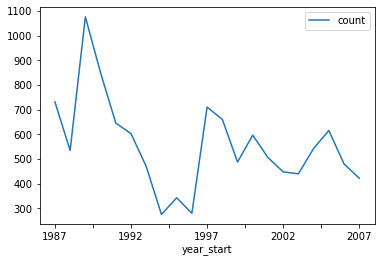

In [106]:
#visualization
df.plot(x='year_start', y='count', kind='line')

<AxesSubplot:xlabel='year_start'>

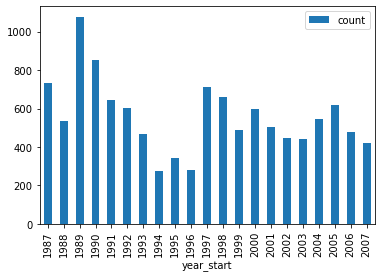

In [107]:
df.plot(x='year_start', y='count', kind='bar')

In [108]:
tfidf_df.to_csv('tfidf.csv')